Sequence 1:
ID: TRINITY_DN34_c0_g1_i1
Description: TRINITY_DN34_c0_g1_i1 len=306 path=[1:0-126 308:127-150 129:151-305] [-1, 1, 308, 129, -2]
Sequence length: 306

Sequence 2:
ID: TRINITY_DN36_c0_g1_i1
Description: TRINITY_DN36_c0_g1_i1 len=307 path=[1:0-306] [-1, 1, -2]
Sequence length: 307

Sequence 3:
ID: TRINITY_DN80_c0_g1_i1
Description: TRINITY_DN80_c0_g1_i1 len=304 path=[1:0-108 87:109-234 213:235-303] [-1, 1, 87, 213, -2]
Sequence length: 304

Sequence 4:
ID: TRINITY_DN80_c0_g1_i2
Description: TRINITY_DN80_c0_g1_i2 len=304 path=[1:0-108 282:109-234 213:235-303] [-1, 1, 282, 213, -2]
Sequence length: 304

Sequence 5:
ID: TRINITY_DN78_c0_g1_i1
Description: TRINITY_DN78_c0_g1_i1 len=334 path=[1:0-194 173:195-333] [-1, 1, 173, -2]
Sequence length: 334

Filtered 5 sequences based on GC content.
K-mer count matrix shape: (5, 698)
Sequence 1 assigned to Cluster 2
Sequence 2 assigned to Cluster 0
Sequence 3 assigned to Cluster 4
Sequence 4 assigned to Cluster 1
Sequence 5 assigned to C

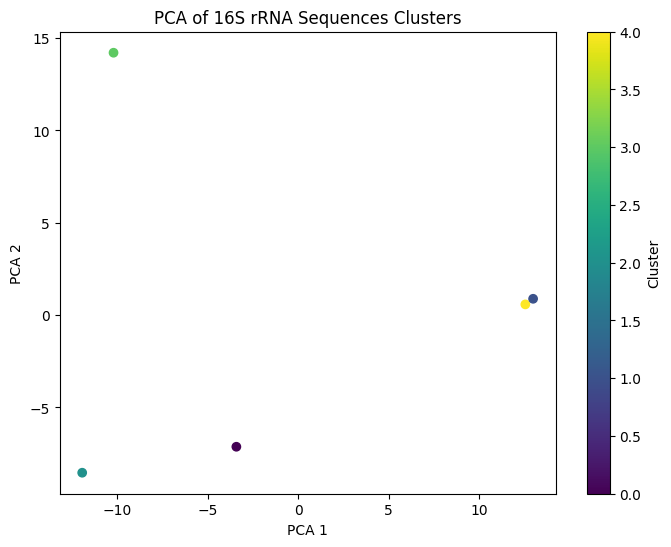

Number of samples: 5, Max k: 4


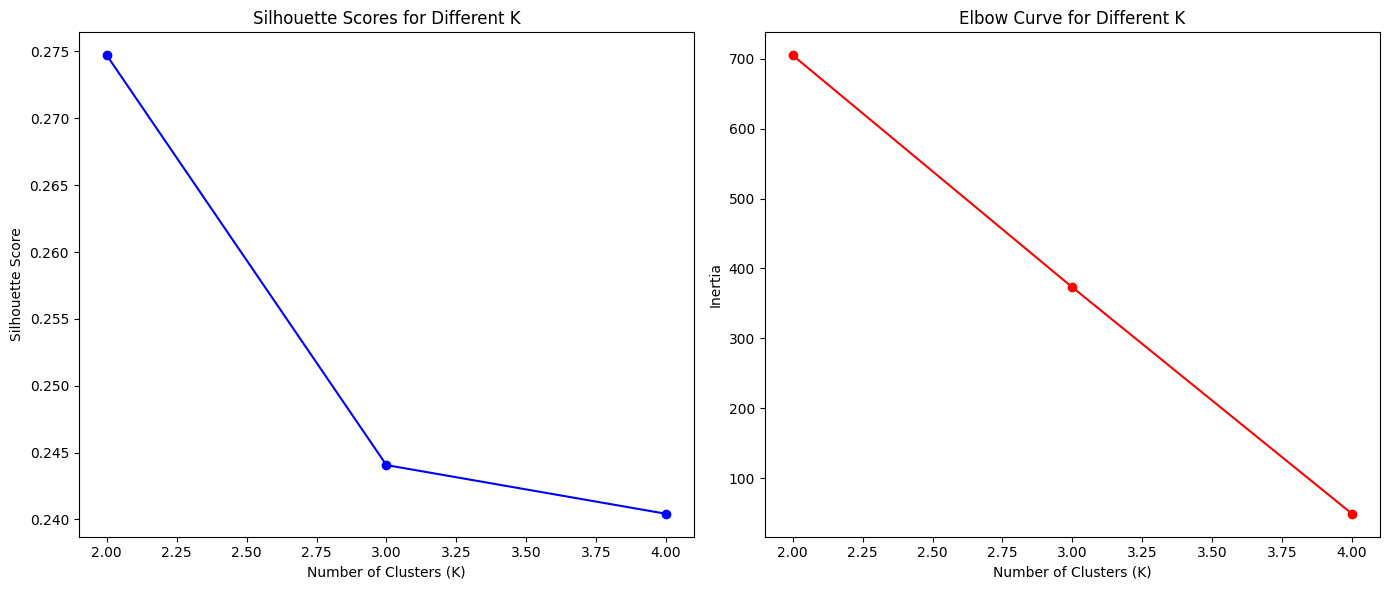

Homogeneity Score: 0.7919
Fowlkes-Mallows Index: 0.0000
Pairwise consistency between runs (higher is better):
[[1.  1.  0.4 1.  0.6 0.4 0.4 0.4 0.6 0.2]
 [1.  1.  0.4 1.  0.6 0.4 0.4 0.4 0.6 0.2]
 [0.4 0.4 1.  0.4 0.2 0.2 0.  0.2 0.2 0.6]
 [1.  1.  0.4 1.  0.6 0.4 0.4 0.4 0.6 0.2]
 [0.6 0.6 0.2 0.6 1.  0.2 0.6 0.6 1.  0.4]
 [0.4 0.4 0.2 0.4 0.2 1.  0.  0.2 0.2 0.2]
 [0.4 0.4 0.  0.4 0.6 0.  1.  0.2 0.6 0. ]
 [0.4 0.4 0.2 0.4 0.6 0.2 0.2 1.  0.6 0.6]
 [0.6 0.6 0.2 0.6 1.  0.2 0.6 0.6 1.  0.4]
 [0.2 0.2 0.6 0.2 0.4 0.2 0.  0.6 0.4 1. ]]


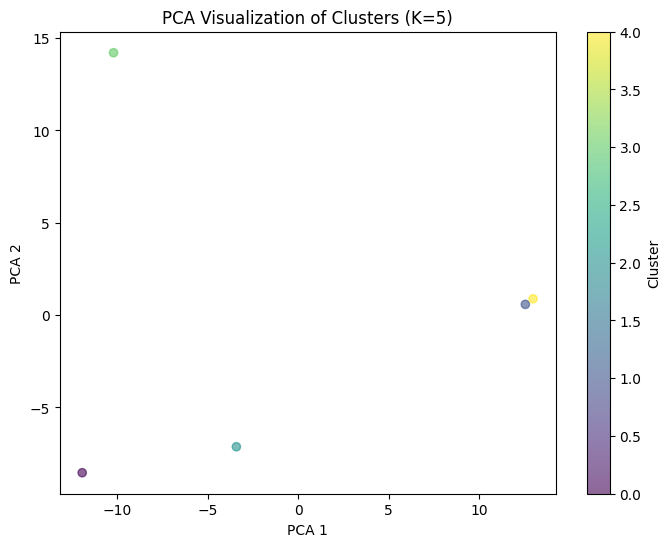

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 hours 22 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_m1lfslay3r6000_ykl1jt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.270 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
Best Model: ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 2791.9999969063724
Total Sum of Square Error to Grand Mean: 2791.9999969063724
Between Cluster Sum of Square Error: 0.0

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           5       2792


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Assuming the previous notebook is called 'AutoML_Hyperparameter_Tuning.ipynb'
%run "C:/Users/m1lfslay3r6000/Music/ESS_569_Project/notebooks/AutoML_Hyperparameter_Tuning.ipynb"

In [8]:
# Assuming 'kmer_matrix_dense' is the feature matrix obtained from previous clustering
# And assuming 'true_labels' are available as the target labels

# Example data (replace this with your actual data)
X = kmer_matrix_dense  # Feature matrix
y = np.random.randint(0, 3, size=(X.shape[0]))  # Example binary labels (replace with actual)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data (important for many models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
# 1. Cross-Validation with different models
# Example with Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=1, scoring='accuracy')
print(f"Cross-validation scores for Logistic Regression: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

InvalidParameterError: The 'cv' parameter of cross_val_score must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.

In [ ]:
# 2. Bootstrapping: Create bootstrap samples and train on them
# Generate a bootstrap sample
X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=42)

# Fit a model on bootstrap sample
logreg.fit(X_bootstrap, y_bootstrap)
y_pred_bootstrap = logreg.predict(X_test)
print(f"Bootstrap Model Accuracy: {accuracy_score(y_test, y_pred_bootstrap):.4f}")

In [ ]:
# 3. Bagging: Using BaggingClassifier (ensemble method)
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
print(f"Bagging Model Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}")

In [ ]:
# 4. Learning Curve Plot
def plot_learning_curve(model, X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        train_predictions = model.predict(X_train[:m])
        val_predictions = model.predict(X_val)
        train_errors.append(log_loss(y_train[:m], train_predictions))
        val_errors.append(log_loss(y_val, val_predictions))
    
    plt.plot(np.sqrt(train_errors), label="Train Error")
    plt.plot(np.sqrt(val_errors), label="Validation Error")
    plt.legend()
    plt.xlabel("Number of training instances")
    plt.ylabel("Log Loss")
    plt.title("Learning Curve")
    plt.show()

# Plot learning curve for Logistic Regression
plot_learning_curve(logreg, X_train, y_train, X_val, y_val)

In [ ]:
# 5. Model Performance Visualization: Accuracy, Log Loss
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print(f"Logistic Regression Accuracy: {acc:.4f}")
print(f"Logistic Regression Log Loss: {logloss:.4f}")

In [ ]:
# 6. Performance Comparison between Models
# Here we will compare performance of different models (e.g., Logistic Regression, Bagging, Random Forest)
models = [logreg, bagging, RandomForestClassifier(n_estimators=100, random_state=42)]
model_names = ["Logistic Regression", "Bagging", "Random Forest"]

results = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_model)
    logloss = log_loss(y_test, y_pred_model)
    results.append({"Model": name, "Accuracy": acc, "Log Loss": logloss})

# Create DataFrame for model comparison
results_df = pd.DataFrame(results)
print(results_df)

# Save the results to CSV for review
results_df.to_csv('model_comparison_results.csv', index=False)

# 7. Discussion
# - Cross-validation and train-val-test splitting help assess the model's robustness and avoid overfitting.
# - Bootstrapping and bagging, as ensemble methods, improve stability and accuracy by combining multiple weak learners.
# - Learning curves provide insights into model training and generalization.
# - The combination of these methods gives a holistic view of model performance.